In [97]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

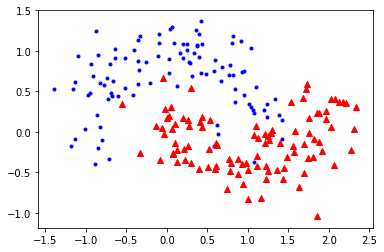

In [110]:
#X, y = make_blobs(n_samples = 250, n_features=2, centers=2, cluster_std=5 )
X, y = make_moons(n_samples=200, noise=0.25)

x0_0, x0_1 = X[y == 0][:,0], X[y == 1][:,0]
x1_0, x1_1 = X[y == 0][:,1], X[y == 1][:,1]

plt.scatter(x0_0, x1_0, marker='.', c='b')
plt.scatter(x0_1, x1_1, marker='^', c='r')
plt.show()


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [112]:
#Create a voting random forest

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

#Create a custom voting classifier
voting_clf = VotingClassifier(
        estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='hard', 
    )

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [113]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    


LogisticRegression 0.9
RandomForestClassifier 0.96
SVC 0.92
VotingClassifier 0.92


In [114]:
#Bagging classifier of decision trees - 'manual' random forest.
#Bootstraping of a model has a comparable bias but reduced variance

from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1
    )

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print ('Accuracy of ensemble model on test set: ', accuracy_score(y_test, y_pred))
print ('Accuracy of single model on test set: ', accuracy_score(y_test, y_pred_tree))

Accuracy of ensemble model on test set:  0.94
Accuracy of single model on test set:  0.96


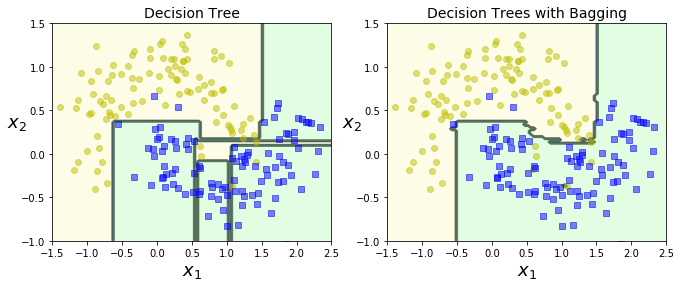

In [127]:
#Reduction of variance (less overfitting) when using ensemble model

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    #create 100 * 100 coordinate array  
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)   
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    #predicted points for each of the points in the coord array
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    #plot contour fillings. each class gets a different color.
    #places where class changes, a line will be drawn
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [129]:
from sklearn.ensemble import RandomForestClassifier

#Random forest classifier. More optimized for ensemble decision tree learning 
#than the BaggingClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

print ('Accuracy of random forest model on test set: ', accuracy_score(y_test, y_pred_rf))

Accuracy of random forest model on test set:  0.94


In [130]:
from sklearn.datasets import load_iris

#Feature importance
#Closer to the root, the more important a feature is. By computing average 
#depth of a feature for all trees in a forest, we get feature importance
#using random forests

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_): 
    print(name, score)



sepal length (cm) 0.10395313793
sepal width (cm) 0.0232018459645
petal length (cm) 0.431149696364
petal width (cm) 0.441695319742
